# WeatherPy - Analysis of Weather Data

----

Here we are creating a Python Script to
  - Randomly select longitude and latitude and use Citipy library and get 500 + unique cities
  - Using Openweathermap API to get the weather conditions for these 500+ cities.
  - Using this data Analyse and plot how the following parameters vary with latitude :
              i)  Max temperature
              ii) Cloudiness 
             iii) Wind 
              iv) Humidity
             


### Observation :
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.




In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/DataAnalytics/output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
plt.style.use('seaborn')
print(lat_range)


(-90, 90)


## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

city_dict=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_obj=citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = f"{city_obj.city_name},{(city_obj.country_code).upper()}"
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
base_url = f"{url}appid={api_key}&units={units}&q="
city_samples = [cities[x:x+50] for x in range(0, len(cities), 50)]

for i , item in enumerate(city_samples):
     
    for j,item in enumerate (city_samples[i]):
          query_url = base_url + item
          print(query_url)
          print(f"Processing record {j+1} of  Set {i+1} with city {item}")
          weather_response = requests.get(query_url)
          weather_json = weather_response.json()
          if weather_json["cod"] != "404": 
            city_dict.append({"City":weather_json["name"],"Lat":weather_json["coord"]["lat"],"Lng":weather_json["coord"]["lon"] ,
                       "Humidity": weather_json["main"]["humidity"],"Country":weather_json["sys"]["country"],
                      "Cloudiness":weather_json["clouds"]["all"],"Max Temp": weather_json["main"]["temp_max"],
                     "Wind speed": weather_json["wind"]["speed"],"Date": weather_json["dt"]})
          else:
            print(f"City not found.Skipping ....")
    
 #Introudce delay for 60 seconds between API calls for a set of 50
    #print("sleep")
    #time.sleep(1)

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=busselton,AU
Processing record 1 of  Set 1 with city busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mahebourg,MU
Processing record 2 of  Set 1 with city mahebourg,MU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=ocos,GT
Processing record 3 of  Set 1 with city ocos,GT
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mataura,PF
Processing record 4 of  Set 1 with city mataura,PF
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=sorvag,FO
Processing record 5 of  Set 1 with city sorvag,FO
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bandarbeyla,SO

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=grand centre,CA
Processing record 49 of  Set 1 with city grand centre,CA
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=vardo,NO
Processing record 50 of  Set 1 with city vardo,NO
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bulgan,MN
Processing record 1 of  Set 2 with city bulgan,MN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=hermanus,ZA
Processing record 2 of  Set 2 with city hermanus,ZA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bluff,NZ
Processing record 3 of  Set 2 with city bluff,NZ
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bredasdorp,ZA
Processing record 4 of  S

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=yellowknife,CA
Processing record 47 of  Set 2 with city yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=taybad,IR
Processing record 48 of  Set 2 with city taybad,IR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=la ronge,CA
Processing record 49 of  Set 2 with city la ronge,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=talnakh,RU
Processing record 50 of  Set 2 with city talnakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=hilo,US
Processing record 1 of  Set 3 with city hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=leh,IN
Processing record 2 of  Set 3 with city leh,IN
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=lasa,CN
Processing record 45 of  Set 3 with city lasa,CN
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=severo-kurilsk,RU
Processing record 46 of  Set 3 with city severo-kurilsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=strezhevoy,RU
Processing record 47 of  Set 3 with city strezhevoy,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=porto walter,BR
Processing record 48 of  Set 3 with city porto walter,BR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=brae,GB
Processing record 49 of  Set 3 with city brae,GB
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=manaure,CO
Processin

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=lata,SB
Processing record 45 of  Set 4 with city lata,SB
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=norman wells,CA
Processing record 46 of  Set 4 with city norman wells,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=yurga,RU
Processing record 47 of  Set 4 with city yurga,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=faya,TD
Processing record 48 of  Set 4 with city faya,TD
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=tabiauea,KI
Processing record 49 of  Set 4 with city tabiauea,KI
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&u

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=tomatlan,MX
Processing record 43 of  Set 5 with city tomatlan,MX
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=atar,MR
Processing record 44 of  Set 5 with city atar,MR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=san jeronimo,MX
Processing record 45 of  Set 5 with city san jeronimo,MX
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=japura,BR
Processing record 46 of  Set 5 with city japura,BR
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=celestun,MX
Processing record 47 of  Set 5 with city celestun,MX
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=preston,US
Processing record 48 

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bengkulu,ID
Processing record 42 of  Set 6 with city bengkulu,ID
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=esperance,AU
Processing record 43 of  Set 6 with city esperance,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=wangkui,CN
Processing record 44 of  Set 6 with city wangkui,CN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=alta floresta,BR
Processing record 45 of  Set 6 with city alta floresta,BR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=enshi,CN
Processing record 46 of  Set 6 with city enshi,CN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mata,CN
Processing recor

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kasongo-lunda,CD
Processing record 40 of  Set 7 with city kasongo-lunda,CD
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=saldanha,ZA
Processing record 41 of  Set 7 with city saldanha,ZA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=pangnirtung,CA
Processing record 42 of  Set 7 with city pangnirtung,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=scarborough,GB
Processing record 43 of  Set 7 with city scarborough,GB
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=yeppoon,AU
Processing record 44 of  Set 7 with city yeppoon,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=sumter,US
Processing record 45 of  Se

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bonaventure,CA
Processing record 39 of  Set 8 with city bonaventure,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=northam,GB
Processing record 40 of  Set 8 with city northam,GB
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=moose jaw,CA
Processing record 41 of  Set 8 with city moose jaw,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kaitangata,NZ
Processing record 42 of  Set 8 with city kaitangata,NZ
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=liuzhou,CN
Processing record 43 of  Set 8 with city liuzhou,CN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=winneba,GH
Processing record 44 of  Set 8 with ci

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bukachacha,RU
Processing record 37 of  Set 9 with city bukachacha,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=lakatoro,VU
Processing record 38 of  Set 9 with city lakatoro,VU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=grindavik,IS
Processing record 39 of  Set 9 with city grindavik,IS
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=sur,OM
Processing record 40 of  Set 9 with city sur,OM
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=khorixas,NA
Processing record 41 of  Set 9 with city khorixas,NA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=naro,PH
Processing record 42 of  Set 9 with city naro,PH
http

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=nanga eboko,CM
Processing record 35 of  Set 10 with city nanga eboko,CM
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=hlotse,LS
Processing record 36 of  Set 10 with city hlotse,LS
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=lolua,TV
Processing record 37 of  Set 10 with city lolua,TV
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=aojiang,CN
Processing record 38 of  Set 10 with city aojiang,CN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=batemans bay,AU
Processing record 39 of  Set 10 with city batemans bay,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=dagda,LV
Processing record 34 of  Set 11 with city dagda,LV
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=huazolotitlan,MX
Processing record 35 of  Set 11 with city huazolotitlan,MX
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=awjilah,LY
Processing record 36 of  Set 11 with city awjilah,LY
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=waipawa,NZ
Processing record 37 of  Set 11 with city waipawa,NZ
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=zabid,YE
Processing record 38 of  Set 11 with city zabid,YE
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=buraydah,SA
Processing record

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=veraval,IN
Processing record 33 of  Set 12 with city veraval,IN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=fort stewart,US
Processing record 34 of  Set 12 with city fort stewart,US
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=akonolinga,CM
Processing record 35 of  Set 12 with city akonolinga,CM
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=ballina,AU
Processing record 36 of  Set 12 with city ballina,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kamenka,RU
Processing record 37 of  Set 12 with city kamenka,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=edd,ER
Processing record 38 of  Set 12 with ci

In [11]:


Weather_data=pd.DataFrame(city_dict)
Weather_data["Formated Date"] =Weather_data["Date"].apply(lambda x : datetime.datetime.utcfromtimestamp(x).strftime('%m/%d/%y'))
Weather_data.to_csv(output_data_file, index=False)
Weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed,Formated Date
0,Busselton,24,AU,1546918712,84,-33.64,115.35,72.57,15.10,01/08/19
1,Mahebourg,40,MU,1546916400,78,-20.41,57.70,80.60,16.11,01/08/19
2,Ocos,75,GT,1546915200,73,14.51,-92.19,77.00,3.36,01/08/19
3,Bandarbeyla,92,SO,1546918713,100,9.49,50.81,75.18,16.67,01/08/19
4,Luderitz,0,NA,1546918713,92,-26.65,15.16,58.48,13.42,01/08/19


In [ ]:
with open(food_menu_filename, "w") as csvfile:
    fieldnames = ["id", "dish", "price"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(food_menu)
Weather_data=pd.DataFrame(city_dict)
Weather_data["Formated Date"] =Weather_data["Date"].apply(lambda x : datetime.datetime.utcfromtimestamp(x).strftime('%m/%d/%y'))
Weather_data.to_csv(output_data_file, index=False)
Weather_data.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

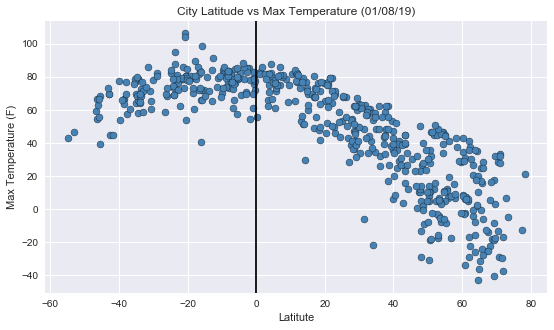

In [15]:
fig,ax = plt.subplots(figsize=(9,5))
ax.scatter(Weather_data["Lat"],Weather_data["Max Temp"],color='steelblue',marker='o',edgecolor='black')
#ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Max Temperature (" + str(Weather_data["Formated Date"].max())+")")
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (F)")
plt.show()


#### Latitude vs. Humidity Plot

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(Weather_data["Lat"],Weather_data["Humidity"],color='steelblue',marker='o',edgecolor='black')
ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Humidity (" + str(Weather_data["Formated Date"].max())+")")
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(Weather_data["Lat"],Weather_data["Cloudiness"],color='steelblue',marker='o',edgecolor='black')
ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Cloudiness (" + str(Weather_data["Formated Date"].max())+")")
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(Weather_data["Lat"],Weather_data["Wind speed"],color='steelblue',marker='o',edgecolor='black')
ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Windspeed (" + str(Weather_data["Formated Date"].max())+")")
plt.show()